#### Note: *This notebook is using the R Kernel (and not the Python Kernel)*

## Load the Data

In [1]:
library(dplyr)
library(tidyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
# Lets start by loading in the data
df_price = read.csv("data/Weed_Price.csv")
str(df_price)

'data.frame':	22899 obs. of  8 variables:
 $ State : Factor w/ 51 levels "Alabama","Alaska",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ HighQ : num  339 289 303 362 249 ...
 $ HighQN: int  1042 252 1941 576 12096 2161 1294 347 433 6506 ...
 $ MedQ  : num  199 261 209 186 194 ...
 $ MedQN : int  933 297 1625 544 12812 1728 1316 273 349 5237 ...
 $ LowQ  : num  149 389 189 126 193 ...
 $ LowQN : int  123 26 222 112 778 128 91 34 39 514 ...
 $ date  : Factor w/ 449 levels "2013-12-27","2013-12-28",..: 6 6 6 6 6 6 6 6 6 6 ...


In [3]:
# Fix the data format in the data
df_price$date <- as.Date(df_price$date)
str(df_price)

'data.frame':	22899 obs. of  8 variables:
 $ State : Factor w/ 51 levels "Alabama","Alaska",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ HighQ : num  339 289 303 362 249 ...
 $ HighQN: int  1042 252 1941 576 12096 2161 1294 347 433 6506 ...
 $ MedQ  : num  199 261 209 186 194 ...
 $ MedQN : int  933 297 1625 544 12812 1728 1316 273 349 5237 ...
 $ LowQ  : num  149 389 189 126 193 ...
 $ LowQN : int  123 26 222 112 778 128 91 34 39 514 ...
 $ date  : Date, format: "2014-01-01" "2014-01-01" ...


In [4]:
head(df_price)

State  HighQ HighQN   MedQ MedQN   LowQ LowQN       date
1    Alabama 339.06   1042 198.64   933 149.49   123 2014-01-01
2     Alaska 288.75    252 260.60   297 388.58    26 2014-01-01
3    Arizona 303.31   1941 209.35  1625 189.45   222 2014-01-01
4   Arkansas 361.85    576 185.62   544 125.87   112 2014-01-01
5 California 248.78  12096 193.56 12812 192.92   778 2014-01-01
6   Colorado 236.31   2161 195.29  1728 213.50   128 2014-01-01

In [5]:
dim(df_price)

[1] 22899     8

In [6]:
# Check for missing value
df_missing <- subset(df_price, is.na(df_price$LowQ))
str(df_missing)

'data.frame':	10557 obs. of  8 variables:
 $ State : Factor w/ 51 levels "Alabama","Alaska",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ HighQ : num  338 303 299 342 244 ...
 $ HighQN: int  1539 350 2638 846 16512 3148 1835 490 657 9369 ...
 $ MedQ  : num  208 270 209 207 189 ...
 $ MedQN : int  1463 475 2426 836 19151 2877 2069 431 578 8166 ...
 $ LowQ  : num  NA NA NA NA NA NA NA NA NA NA ...
 $ LowQN : int  182 37 306 145 1096 178 126 41 49 695 ...
 $ date  : Date, format: "2015-01-01" "2015-01-01" ...


In [7]:
# Create the new dataframe for summary by years
df_price_high <- df_price %>%
                group_by(State) %>%
                summarise(HighQ_Mean = mean(HighQ))
str(df_price_high)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	51 obs. of  2 variables:
 $ State     : Factor w/ 51 levels "Alabama","Alaska",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ HighQ_Mean: num  340 291 301 348 245 ...
 - attr(*, "drop")= logi TRUE


In [8]:
# Create the new dataframe for summary by years
df_price_mean <- df_price %>%
                group_by(State) %>%
                summarise_each(funs(mean(., na.rm = TRUE)))
str(df_price_mean)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	51 obs. of  8 variables:
 $ State : Factor w/ 51 levels "Alabama","Alaska",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ HighQ : num  340 291 301 348 245 ...
 $ HighQN: num  1379 321 2392 752 14947 ...
 $ MedQ  : num  205 262 209 190 191 ...
 $ MedQN : num  1270 408 2137 725 16770 ...
 $ LowQ  : num  147 387 191 127 191 ...
 $ LowQN : num  161.1 32.3 279 135.9 976.3 ...
 $ date  : Date, format: "2014-08-14" "2014-08-14" ...
 - attr(*, "drop")= logi TRUE


In [9]:
head(df_price_mean)

Source: local data frame [6 x 8]

       State    HighQ     HighQN     MedQ      MedQN     LowQ     LowQN
1    Alabama 339.5618  1379.4143 204.6062  1270.3519 146.8326 161.14922
2     Alaska 291.4820   321.2450 262.0464   407.9176 387.2327  32.33408
3    Arizona 300.6675  2392.4655 209.3653  2137.4143 190.8269 279.00668
4   Arkansas 348.0561   751.9889 190.4147   724.6837 127.3455 135.90200
5 California 245.3761 14947.0735 191.2689 16769.8218 190.7960 976.29844
6   Colorado 238.9187  2816.2183 196.5325  2457.5122 226.7906 165.34967
Variables not shown: date (date)

In [10]:
# Load the demographic data
df_demo <- read.csv("data/Demographics_State.csv")
str(df_demo)

'data.frame':	51 obs. of  9 variables:
 $ region           : Factor w/ 51 levels "alabama","alaska",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ total_population : int  4799277 720316 6479703 2933369 37659181 5119329 3583561 908446 619371 19091156 ...
 $ percent_white    : int  67 63 57 74 40 70 70 65 35 57 ...
 $ percent_black    : int  26 3 4 15 6 4 9 21 49 15 ...
 $ percent_asian    : int  1 5 3 1 13 3 4 3 3 2 ...
 $ percent_hispanic : int  4 6 30 7 38 21 14 8 10 23 ...
 $ per_capita_income: int  23680 32651 25358 22170 29527 31109 37892 29819 45290 26236 ...
 $ median_rent      : int  501 978 747 480 1119 825 880 828 1154 838 ...
 $ median_age       : num  38.1 33.6 36.3 37.5 35.4 36.1 40.2 38.9 33.8 41 ...


In [11]:
# Calculate population by type
df_demo$pop_white <- ceiling(df_demo$percent_white / 100 * df_demo$total_population)
df_demo$pop_black <- ceiling(df_demo$percent_black / 100 * df_demo$total_population)
df_demo$pop_asian <- ceiling(df_demo$percent_asian / 100 * df_demo$total_population)
df_demo$pop_hispanic <- ceiling(df_demo$percent_hispanic / 100 * df_demo$total_population)

In [12]:
# Calculate others percentage in the population type
df_demo$percent_other <- 100 - df_demo$percent_white - df_demo$percent_black - df_demo$percent_asian - df_demo$percent_hispanic
df_demo$pop_other <- df_demo$total_population - df_demo$pop_white - df_demo$pop_black - df_demo$pop_asian - df_demo$pop_hispanic

In [13]:
colnames(df_price_mean)[1] <- "region"
df_price_mean$region <- tolower(df_price_mean$region)
df <- merge(df_price_mean, df_demo, by = "region")
str(df)

'data.frame':	51 obs. of  22 variables:
 $ region           : chr  "alabama" "alaska" "arizona" "arkansas" ...
 $ HighQ            : num  340 291 301 348 245 ...
 $ HighQN           : num  1379 321 2392 752 14947 ...
 $ MedQ             : num  205 262 209 190 191 ...
 $ MedQN            : num  1270 408 2137 725 16770 ...
 $ LowQ             : num  147 387 191 127 191 ...
 $ LowQN            : num  161.1 32.3 279 135.9 976.3 ...
 $ date             : Date, format: "2014-08-14" "2014-08-14" ...
 $ total_population : int  4799277 720316 6479703 2933369 37659181 5119329 3583561 908446 619371 19091156 ...
 $ percent_white    : int  67 63 57 74 40 70 70 65 35 57 ...
 $ percent_black    : int  26 3 4 15 6 4 9 21 49 15 ...
 $ percent_asian    : int  1 5 3 1 13 3 4 3 3 2 ...
 $ percent_hispanic : int  4 6 30 7 38 21 14 8 10 23 ...
 $ per_capita_income: int  23680 32651 25358 22170 29527 31109 37892 29819 45290 26236 ...
 $ median_rent      : int  501 978 747 480 1119 825 880 828 1154 838 ...
 $

In [14]:
# Load the visualisation and data manipulation library
library(ggplot2)
library(scales)

## Single Variable Visualisation

In [15]:
# Create the new dataframe for summary by years
head(df)

region    HighQ     HighQN     MedQ      MedQN     LowQ     LowQN
1    alabama 339.5618  1379.4143 204.6062  1270.3519 146.8326 161.14922
2     alaska 291.4820   321.2450 262.0464   407.9176 387.2327  32.33408
3    arizona 300.6675  2392.4655 209.3653  2137.4143 190.8269 279.00668
4   arkansas 348.0561   751.9889 190.4147   724.6837 127.3455 135.90200
5 california 245.3761 14947.0735 191.2689 16769.8218 190.7960 976.29844
6   colorado 238.9187  2816.2183 196.5325  2457.5122 226.7906 165.34967
        date total_population percent_white percent_black percent_asian
1 2014-08-14          4799277            67            26             1
2 2014-08-14           720316            63             3             5
3 2014-08-14          6479703            57             4             3
4 2014-08-14          2933369            74            15             1
5 2014-08-14         37659181            40             6            13
6 2014-08-14          5119329            70             4             3
  percent_hispanic per_capita_income median_rent median_age pop_white pop_black
1                4             23680         501       38.1   3215516   1247813
2                6             32651         978       33.6    453800     21610
3               30             25358         747       36.3   3693431    259189
4                7             22170         480       37.5   2170694    440006
5               38             29527        1119       35.4  15063673   2259551
6               21             31109         825       36.1   3583531    204774
  pop_asian pop_hispanic percent_other pop_other
1     47993       191972             2     95983
2     36016        43219            23    165671
3    194392      1943911             6    388780
4     29334       205336             3     87999
5   4895694     14310489             3   1129774
6    153580      1075060             2    102384

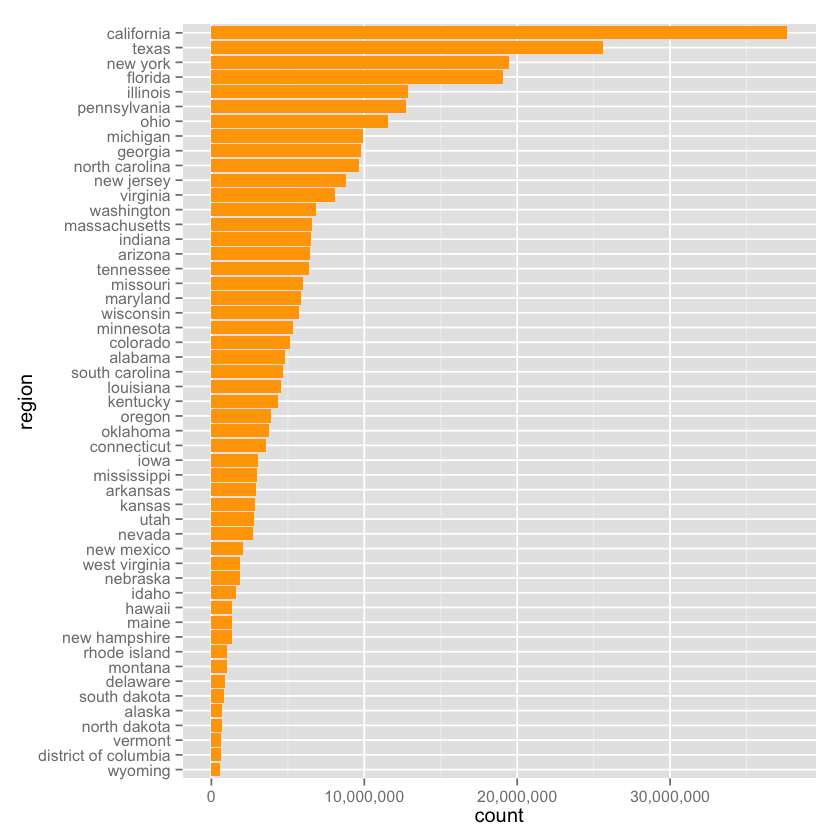

In [16]:
# Distribution - Barchart for the population by states
ggplot(df) + aes(reorder(region, total_population),weight = total_population) + 
  geom_bar(fill = "orange") + xlab("region") + scale_y_continuous(labels = comma) + coord_flip()

In [17]:
# Change from tall to wide dataset
df_wide <- df %>%
                select(1, 17:20,22 ) %>%
                gather("pop_frac", "value", 2:6)
str(df_wide)
head(df_wide)

'data.frame':	255 obs. of  3 variables:
 $ region  : chr  "alabama" "alaska" "arizona" "arkansas" ...
 $ pop_frac: Factor w/ 5 levels "pop_white","pop_black",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ value   : num  3215516 453800 3693431 2170694 15063673 ...


region  pop_frac    value
1    alabama pop_white  3215516
2     alaska pop_white   453800
3    arizona pop_white  3693431
4   arkansas pop_white  2170694
5 california pop_white 15063673
6   colorado pop_white  3583531

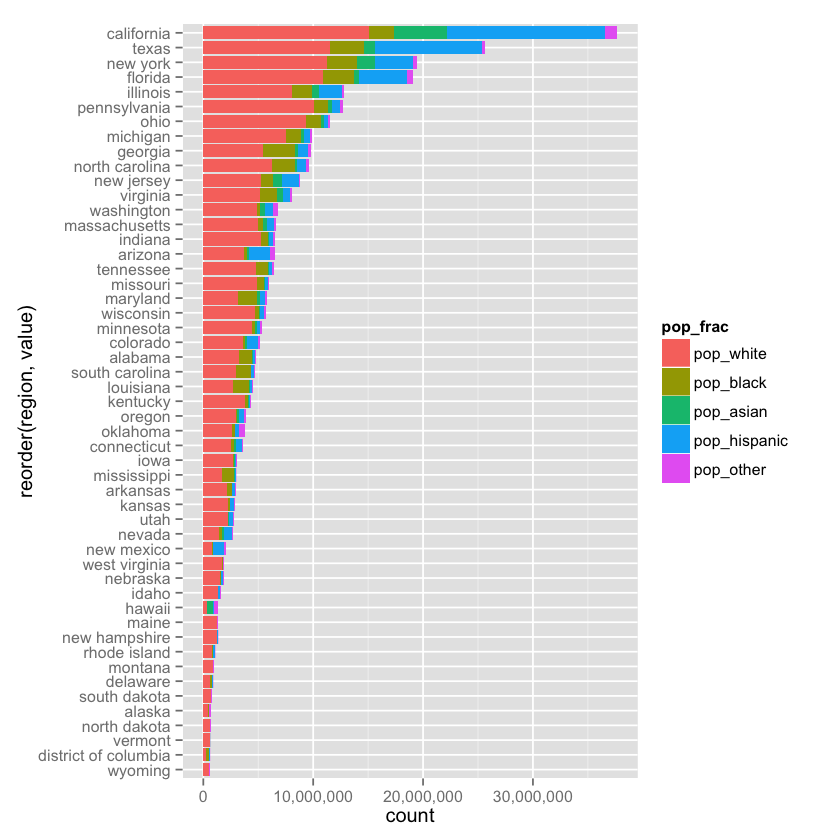

In [18]:
# Distribution -  Population by states by Type
ggplot(df_wide) + aes(reorder(region,value), weight = value, fill=pop_frac) +
  geom_bar() + coord_flip() + scale_y_continuous(labels = comma)

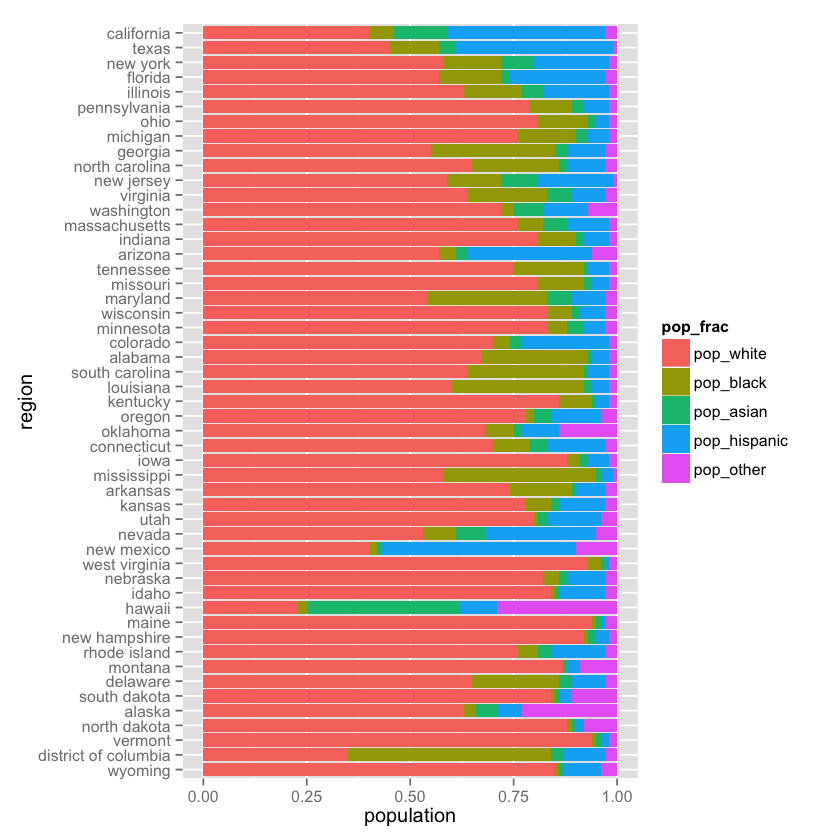

In [19]:
# Distribution -  Population by states by Type (Fill)
ggplot(df_wide) + aes(reorder(region,value), weight = value, fill=pop_frac) +
  geom_bar(position = "fill") + xlab("region") + ylab("population") + coord_flip()

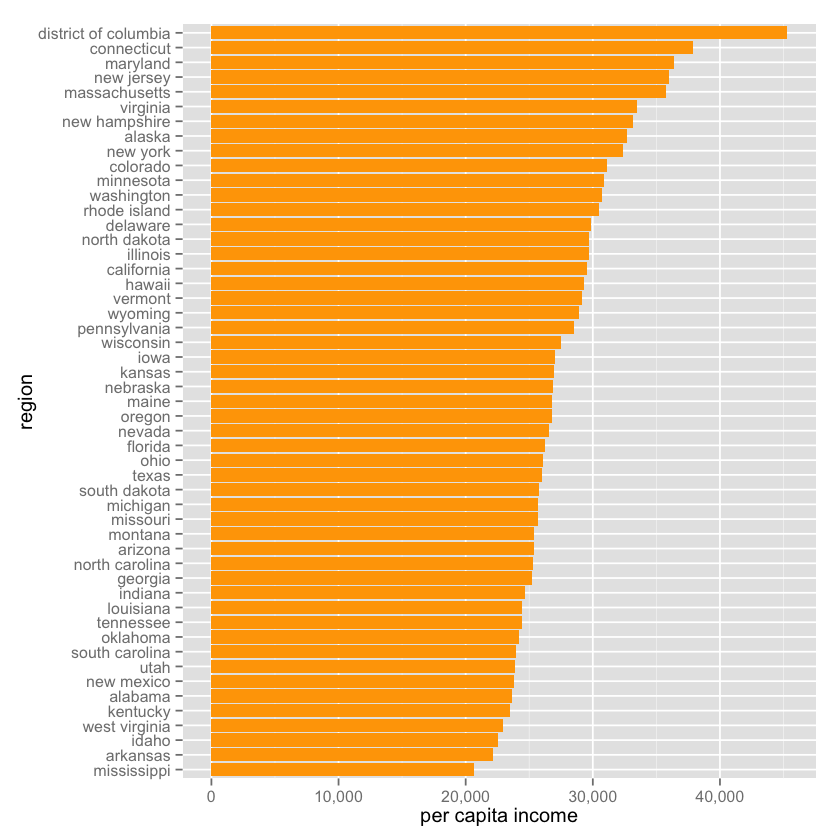

In [20]:
# Distribution - Per capita Income for each state
ggplot(df) + aes(reorder(region, per_capita_income), weight = per_capita_income) + 
  geom_bar(fill = "orange") + xlab("region") + ylab("per capita income") +
  scale_y_continuous(labels = comma) + coord_flip()

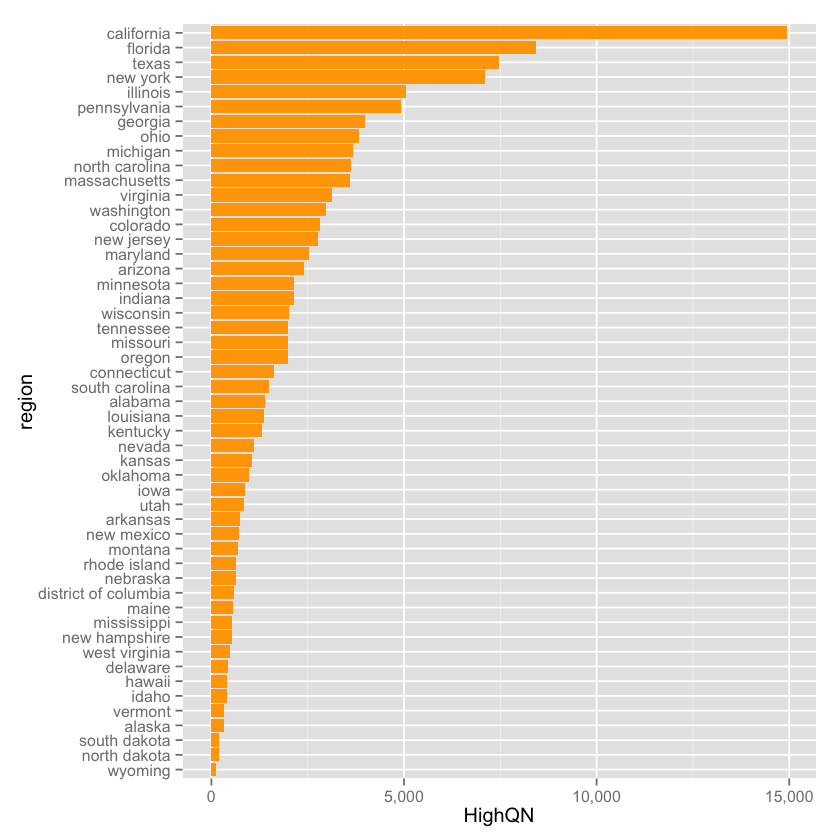

In [21]:
# Distribution - High Quality Number for each state
ggplot(df) + aes(reorder(region, HighQN), weight = HighQN) + 
  geom_bar(fill = "orange") + xlab("region") + ylab("HighQN") +
  scale_y_continuous(labels = comma) + coord_flip()

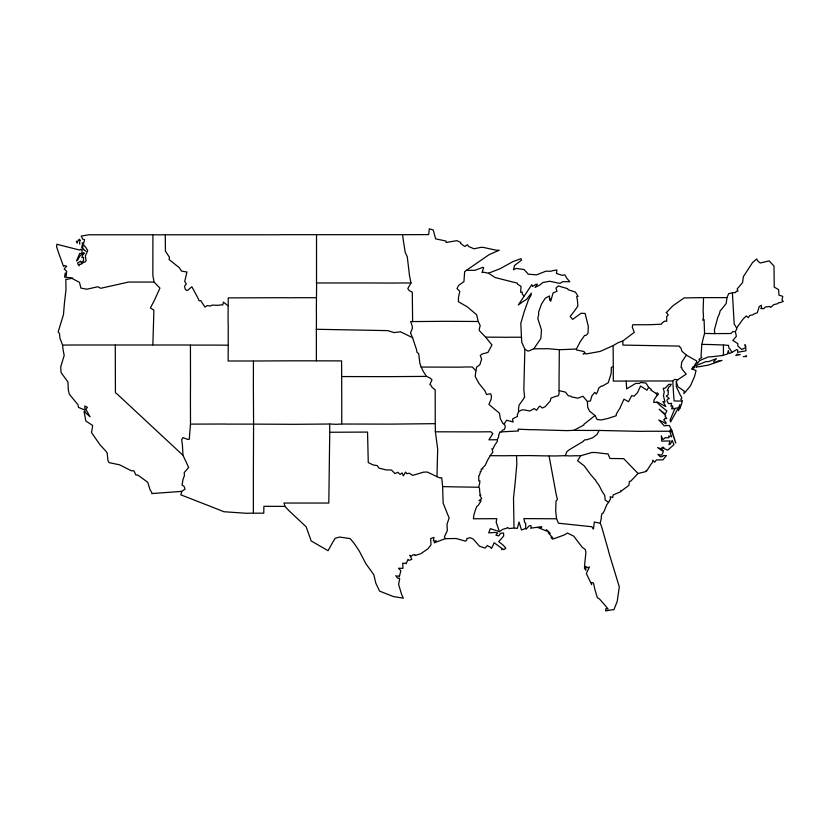

In [22]:
# Distribution - Mapping on geographic projection
library(maps)
map("state")

In [23]:
# Create the dataset for choloropleth map
states <- map_data("state")
chloro <- merge(states, df, sort = FALSE, by = "region")

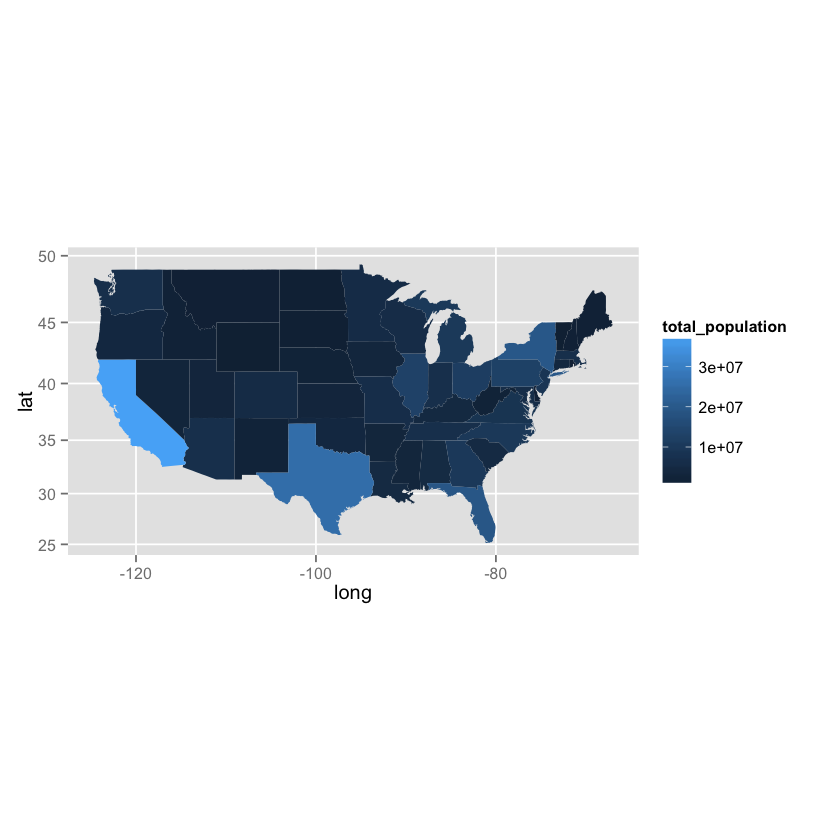

In [24]:
# Choloropleth for Total Population
ggplot(chloro) + aes(long, lat, group = group, fill = total_population) +
  geom_polygon() + coord_map()

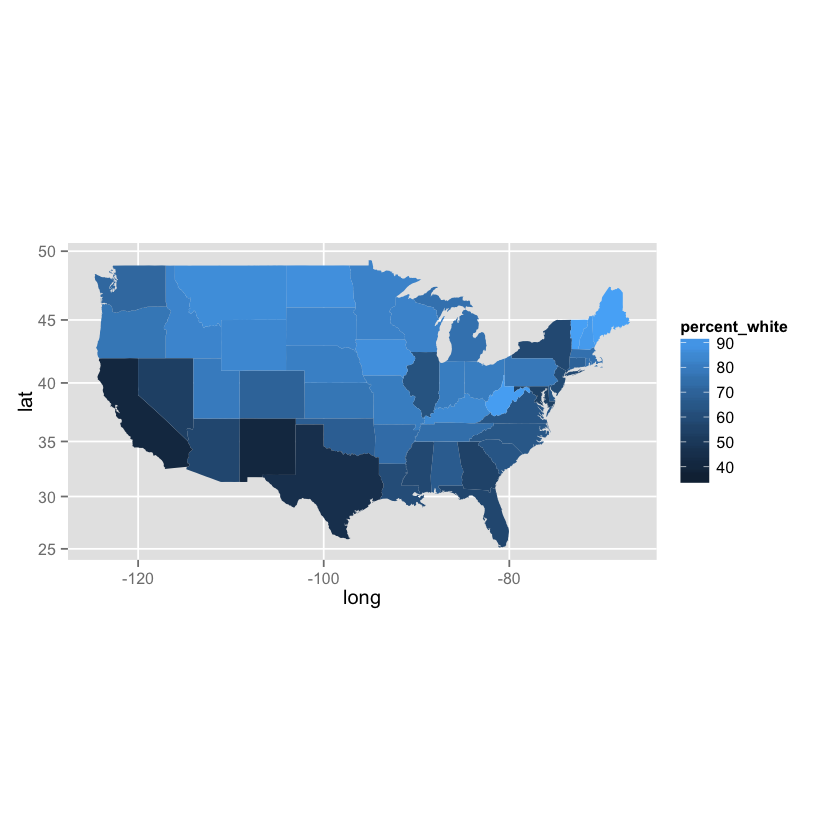

In [25]:
# Choloropleth for White Population
ggplot(chloro) + aes(long, lat, group = group, fill = percent_white) +
  geom_polygon() + coord_map()

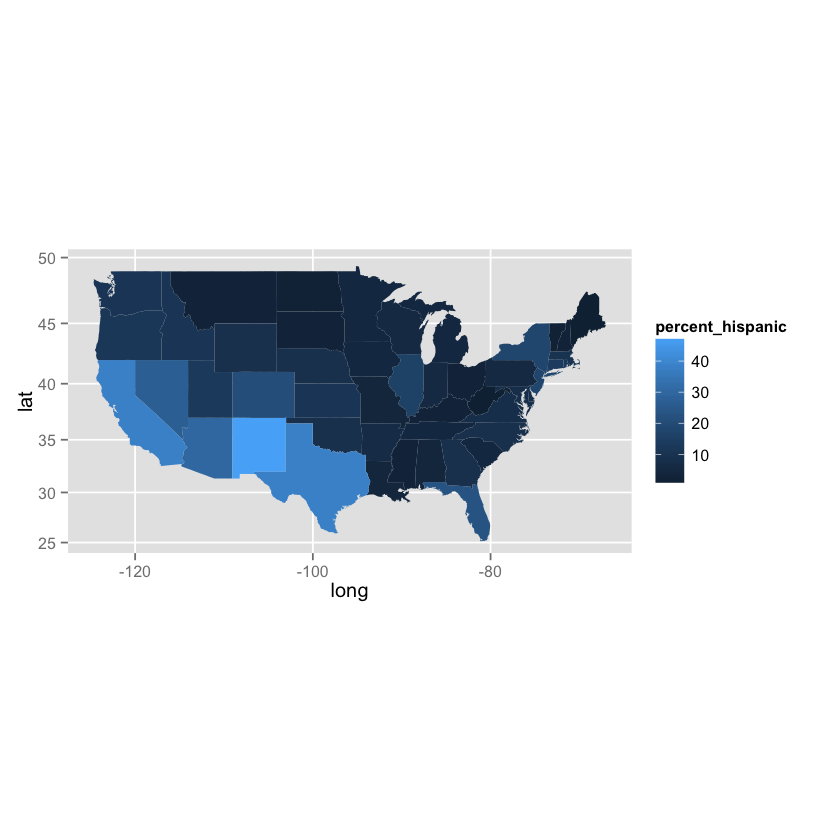

In [26]:
# Choloropleth for Hispanic Population
ggplot(chloro) + aes(long, lat, group = group, fill = percent_hispanic) +
  geom_polygon() + coord_map()

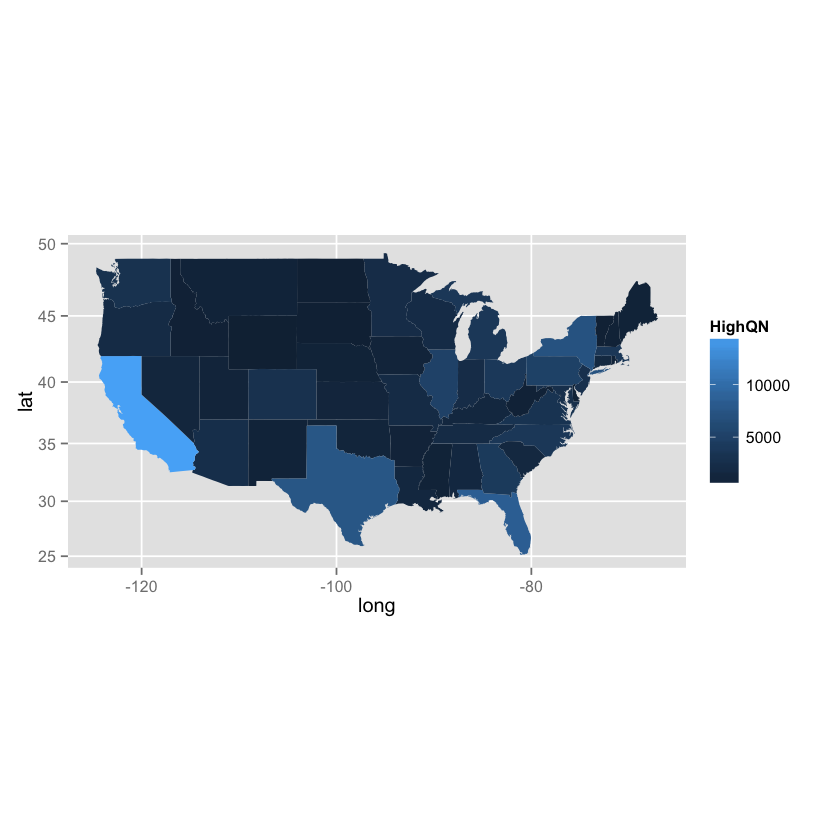

In [27]:
# Quantity of Weed - High
ggplot(chloro) + aes(long, lat, group = group, fill = HighQN) +
  geom_polygon() + coord_map()

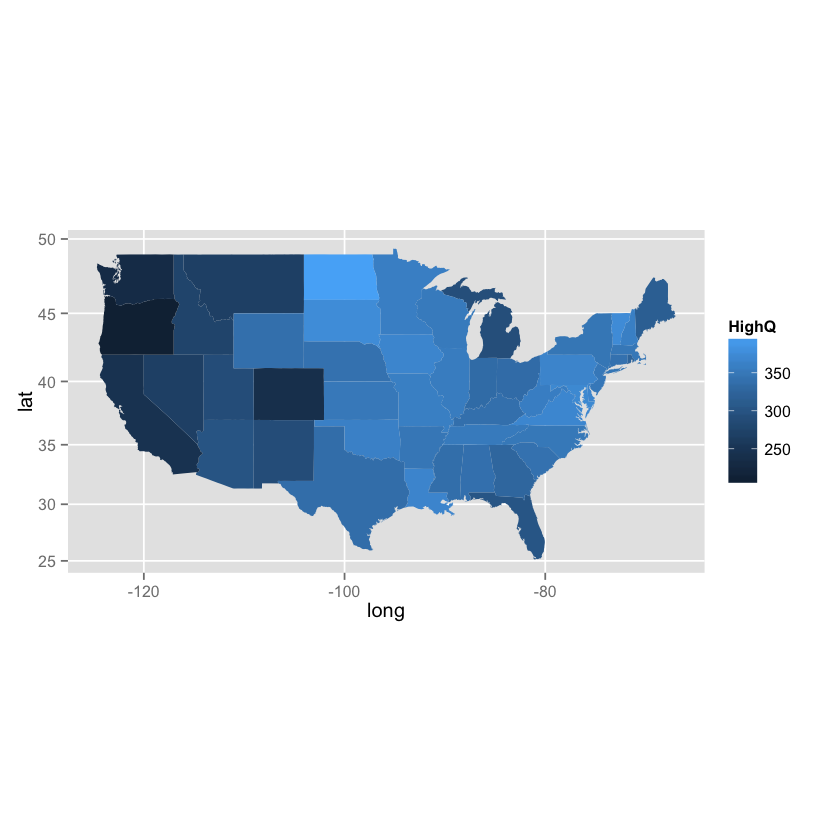

In [28]:
# Price of Weed - High
ggplot(chloro) + aes(long, lat, group = group, fill = HighQ) +
  geom_polygon() + coord_map()

## Two Variable Visualisation

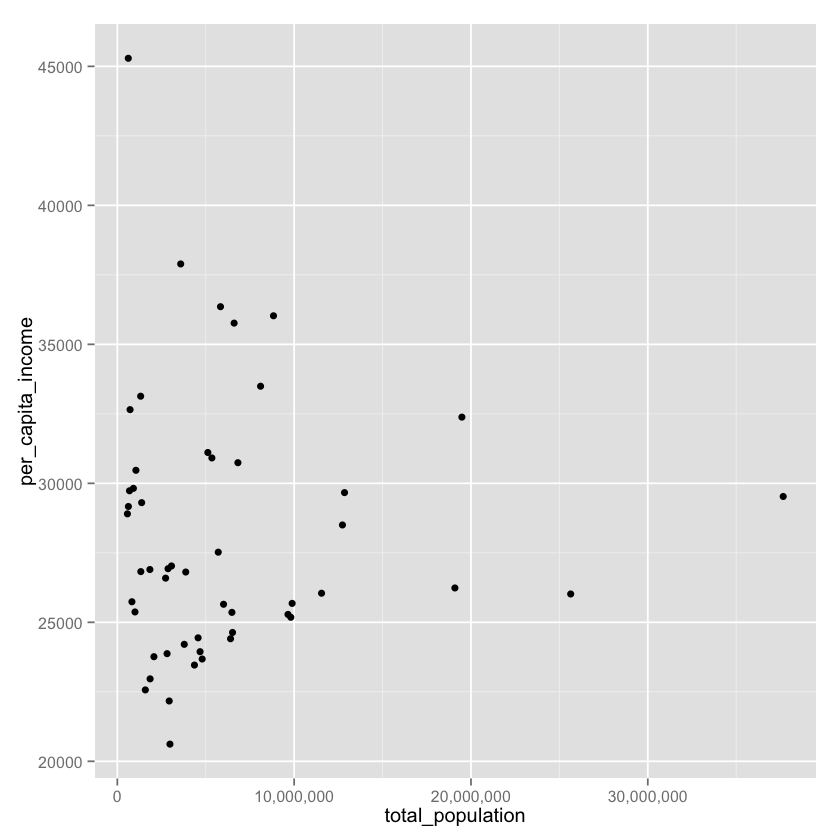

In [29]:
# Scatter - Per capita Income vs Total population
ggplot(df_demo) + aes(total_population, per_capita_income) +
    geom_point() + scale_x_continuous(label = comma)

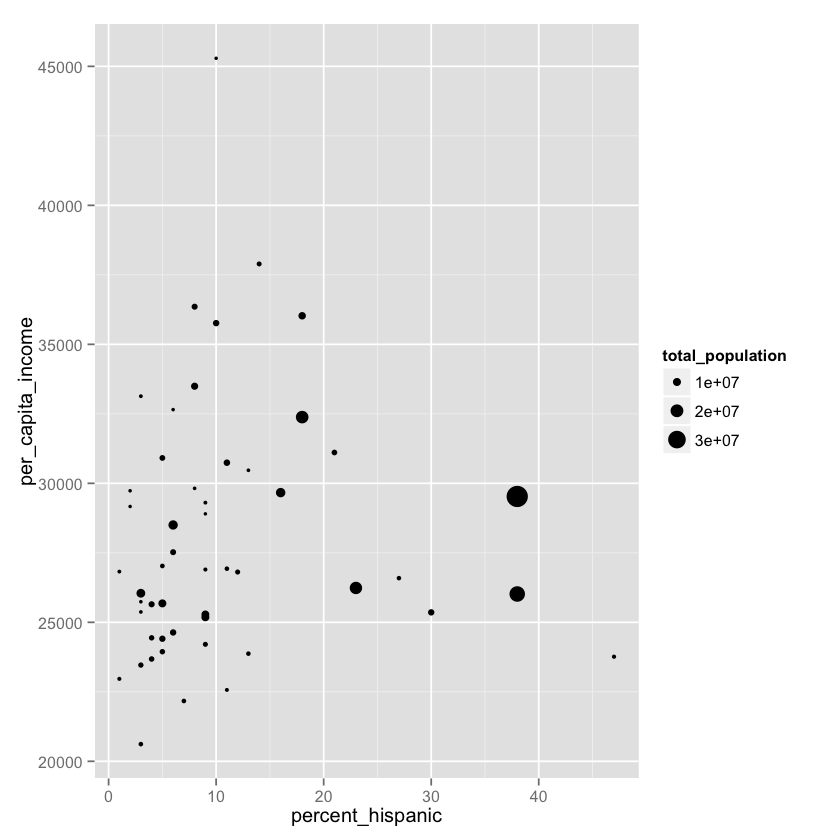

In [30]:
# Bubble - Per capita Income vs White_Population, Size = Total population
ggplot(df_demo) + aes(percent_hispanic, per_capita_income, size = total_population) +
    geom_point() + scale_x_continuous(label = comma)